### 지도학습

입력 데이터와 출력 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용됨

분류: 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측

회귀: 연속적인 숫자, 혹은 부동 소수점을 예측하는 것

일반화 : 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있는 경우(잘된 학습)

과적합 : 학습용 데이터를 너무 잘 학습해서 발생하는 문제, 학습하지 않은 데이터가 입력될 경우 결과를 이상하게 도출함(과소적합, 과대적합)


### 사용할 데이터

- forge.scv :  임의로 발생시킨 데이터, 분류 테스트용
- wave.csv :  임의로 발생시킨 데이터, 회귀 테스트용
- boston.csv :  미국 보스턴 지역의 집값 관련 데이터, 회귀 테스트용
- breast_cancer.csv :  유방암 관련 데이터, 분류 테스트용
- 데이터 출처 :  사이킷런

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df1 = pd.read_csv('forge.csv')
df1

,attr1,attr2,target
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0
5,8.309889,4.806240,1
6,11.930271,4.648663,1
7,9.672847,-0.202832,0
8,8.348103,5.134156,1
9,8.674947,4.475731,1


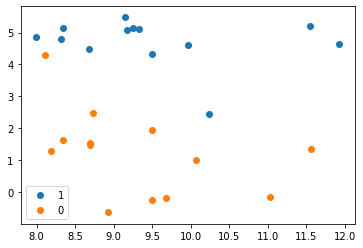

In [15]:
sub_df1 = df1[df1['target'] == 1]
sub_df2 = df1[df1['target'] == 0]

plt.scatter(sub_df1['attr1'], sub_df1['attr2'], label = '1')
plt.scatter(sub_df2['attr1'], sub_df2['attr2'], label = '0')
plt.legend()

In [22]:
df2 = pd.read_csv('wave.csv')
df2

,data,target
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736
5,-2.064033,-2.471962
6,-2.651498,-1.527308
7,2.197057,1.494172
8,0.606690,1.000324
9,1.248435,0.229562


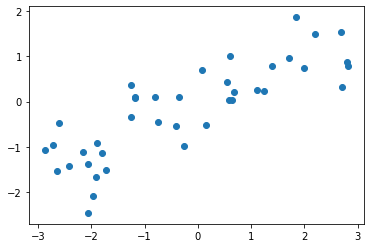

In [23]:
plt.scatter(df2['data'], df2['target'])

In [20]:
df3 = pd.read_csv('boston.csv')
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
df4 = pd.read_csv('breast_cancer.csv')
df4.head()

# malignant : 악성
# benign : 양성

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant
